<a href="https://colab.research.google.com/github/contatofe/Estudos-e-Desafios/blob/main/An%C3%A1lise_de_sentimentos_Udemy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importações

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from wordcloud import WordCloud
import re
import nltk
from nltk.tokenize import word_tokenize
import string
from nltk.corpus import stopwords
from nltk.stem import RSLPStemmer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [ ]:
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('rslp')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package rslp to /root/nltk_data...
[nltk_data]   Unzipping stemmers/rslp.zip.


True

# Analisando os dados

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Arquivos - Dados/delivery_alimentos.csv")
df

,Unnamed: 0,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion,sortOrder,appId
0,0,2cf8d528-4be9-4582-8029-b12c7853ba9c,Daniela Aguilar,https://play-lh.googleusercontent.com/a-/ALV-U...,Fiz um pedido e veio com um item faltando. Ao ...,1,252,9.223.0,2023-09-09 02:48:00,NaN,NaN,9.223.0,most_relevant,br.com.brainweb.ifood
1,1,a0aefee6-4c2b-4d87-86d6-45ea111dcf50,Arlan Cruz (Miguelito),https://play-lh.googleusercontent.com/a-/ALV-U...,Informações do produto e imagens sem clareza. ...,1,173,9.223.0,2023-09-10 00:24:00,NaN,NaN,9.223.0,most_relevant,br.com.brainweb.ifood
2,2,4b28558b-23e9-4e14-96b6-6e0e936f1ff1,Gabriel Liondas,https://play-lh.googleusercontent.com/a-/ALV-U...,"Uso o aplicativo a um bom tempo, porém, tive u...",1,12,9.222.1,2023-09-09 16:46:25,NaN,NaN,9.222.1,most_relevant,br.com.brainweb.ifood
3,3,a7d610c9-30aa-4f8b-9a14-142ca9ec3b15,Ester Araújo,https://play-lh.googleusercontent.com/a-/ALV-U...,Não tem mais preocupação com qualidade. Os ent...,1,32,9.221.0,2023-08-31 21:14:46,NaN,NaN,9.221.0,most_relevant,br.com.brainweb.ifood
4,4,9c203cc4-289f-46cf-b55a-6332791b3b8c,Adr_Alv,https://play-lh.googleusercontent.com/a-/ALV-U...,"Não aparece mais cupons, a mais de 7 meses par...",1,14,9.222.1,2023-09-08 14:40:36,NaN,NaN,9.222.1,most_relevant,br.com.brainweb.ifood
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35977,35977,785b13d8-ccc9-4629-b844-557f90d4d734,Lais De Lima,https://play-lh.googleusercontent.com/a/ACg8oc...,Muito bom amei esse app,5,0,10.0.0,2023-07-15 18:45:03,NaN,NaN,10.0.0,newest,com.vanuatu.aiqfome
35978,35978,c2121839-7857-49c9-9609-27aed288d297,Marta Silva,https://play-lh.googleusercontent.com/a-/ALV-U...,Muito bom,5,0,10.0.0,2023-07-15 15:56:29,NaN,NaN,10.0.0,newest,com.vanuatu.aiqfome
35979,35979,b5286f42-23a0-408c-9fc4-5c0f069e950a,Bp Santos,https://play-lh.googleusercontent.com/a/ACg8oc...,Ótimo pra todo momento www.aiqfome.com,5,0,10.0.0,2023-07-15 03:09:38,NaN,NaN,10.0.0,newest,com.vanuatu.aiqfome
35980,35980,b31c7352-1b90-4caf-81d7-e0e2ae9b44d5,Mauro Cesar,https://play-lh.googleusercontent.com/a-/ALV-U...,Top 🤝🏻,5,0,10.0.0,2023-07-15 00:42:34,NaN,NaN,10.0.0,newest,com.vanuatu.aiqfome


In [ ]:
# Verificando nulos

def check_nulls():
  number_nulls = df.isnull().sum()
  print("Número de nulos por coluna:\n")
  print(number_nulls, '\n')

check_nulls()

Número de nulos por coluna:

Unnamed: 0                  0
reviewId                    0
userName                    0
userImage                   0
content                     0
score                       0
thumbsUpCount               0
reviewCreatedVersion     3361
at                          0
replyContent            27020
repliedAt               27020
appVersion               3361
sortOrder                   0
appId                       0
dtype: int64 



número mínimo de palavras: 1
número máximo de palavras: 350
número médio de palavras: 28.09



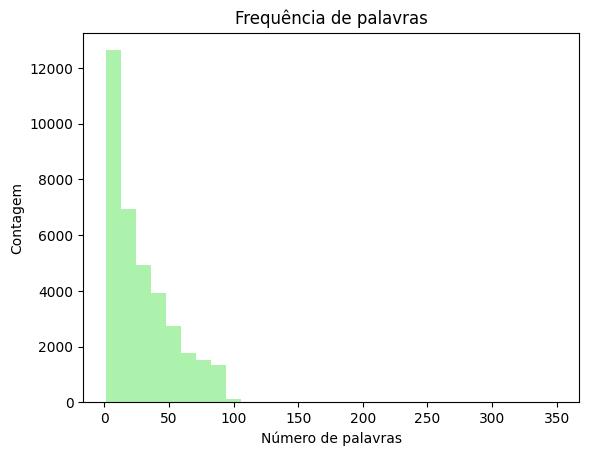

In [ ]:
# Contando palavras

df['word_count'] = df['content'].str.split().apply(len)
print(f"número mínimo de palavras: {df['word_count'].min()}")
print(f"número máximo de palavras: {df['word_count'].max()}")
print(f"número médio de palavras: {df['word_count'].mean():.2f}\n")

sns.histplot(data = df, x = 'word_count', color='lightgreen', bins = 30, edgecolor=None)
plt.title('Frequência de palavras')
plt.xlabel('Número de palavras')
plt.ylabel('Contagem')
plt.show()

Frequência de cada nota:

score
4    9000
5    9000
1    5994
2    5994
3    5994
Name: count, dtype: int64


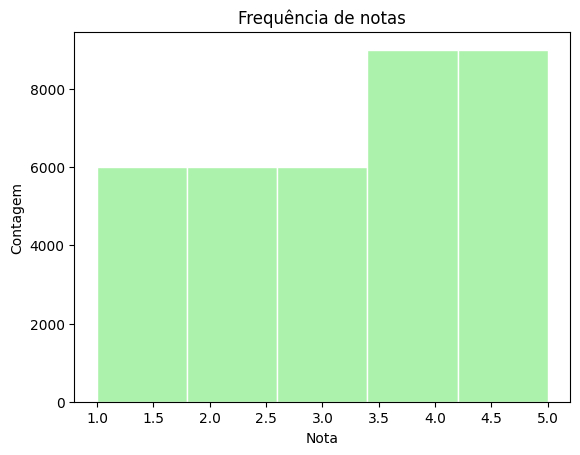

In [ ]:
# Verificando distribuição do score

print(f'Frequência de cada nota:\n')
print(df['score'].value_counts())

sns.histplot(data = df, x = 'score', color='lightgreen', bins= 5, edgecolor='white')
plt.title('Frequência de notas')
plt.xlabel('Nota')
plt.ylabel('Contagem')
plt.show()


In [ ]:
# Palavras mais frequentes

all_text = ' '.join(df['content'])
words = all_text.split()
word_count = Counter(words)

most_common_words = word_count.most_common(10)
print(pd.DataFrame(most_common_words, columns=['Palavra', 'Frequência']))

  Palavra  Frequência
0       o       34379
1      de       32419
2       e       30626
3     que       24527
4     não       22092
5       a       19925
6       é       12873
7     com       10660
8      do       10532
9      um        9547


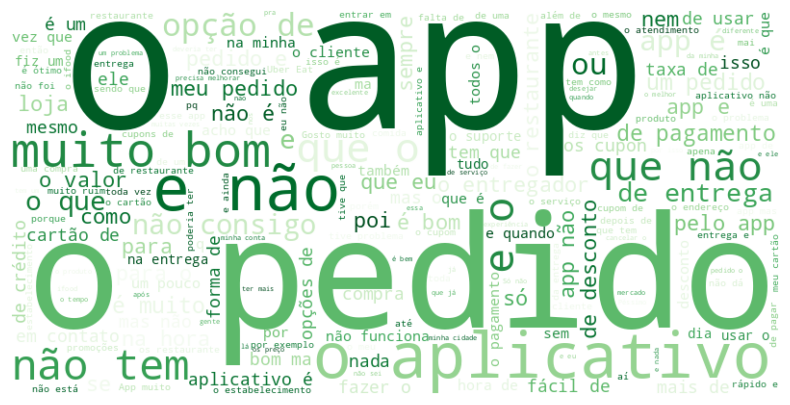

In [ ]:
wordcloud = WordCloud(width = 800, height = 400, background_color = 'white', colormap = 'Greens').generate(all_text)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

# Pré Processamento

In [ ]:
# Removendo textos muito longos

df = df[df['word_count'] <= 150]

In [ ]:
# Removendo emojis

def remove_emojis(text):
  emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # símbolos & pictogramas
                           u"\U0001F680-\U0001F6FF"  # transportes e símbolos
                           u"\U0001F700-\U0001F77F"  # símbolos alquímicos
                           u"\U0001F780-\U0001F7FF"  # símbolos geométricos
                           u"\U0001F800-\U0001F8FF"  # suplemento de símbolos e pictogramas
                           u"\U0001F900-\U0001F9FF"  # emoticons adicionais
                           u"\U0001FA00-\U0001FA6F"  # objetos diversos
                           u"\U0001FA70-\U0001FAFF"  # símbolos diversos
                           u"\U0001F004"              # símbolo de cartão de jogo
                           u"\U0001F0CF"              # símbolo do baralho
                           u"\U0001F170-\U0001F251"  # emojis de letras (variante)
                           u"\U00002702-\U000027B0"  # símbolos diversos
                           u"\U000024C2-\U0001F251"
                           "]+", flags = re.UNICODE)
  return emoji_pattern.sub(r'', text)

df['removed_emoji'] = df['content'].apply(remove_emojis)

In [ ]:
# Removendo links

def remove_link(text):
  text_without_links = re.sub(r'www\S+|http\S+|ftp\S+', '', text)
  return text_without_links

df['removed_links'] = df['removed_emoji'].apply(remove_link)

In [ ]:
# Tokenizando as palavras

def tokenize_text(text):
  tokens = word_tokenize(text)
  return tokens

df['tokens'] = df['removed_links'].apply(tokenize_text)

In [ ]:
# Convertendo todas as palavras para minúscula

def lowercase(tokens):
  lowercase_tokens = [token.lower() for token in tokens]
  return lowercase_tokens

df['tokens_lowercase'] = df['tokens'].apply(lowercase)

In [ ]:
# Removendo pontuações

def remove_punctuation(tokens):
  tokens_without_punctuation = [token for token in tokens if token not in string.punctuation]
  return tokens_without_punctuation

df['tokens_without_punctuation'] = df['tokens_lowercase'].apply(remove_punctuation)

In [ ]:
# Acrescentando app nos stopwords

stop_words = stopwords.words('portuguese')
stop_words.append('app')

# Removendo Stopwords

def remove_stopwords(tokens):
  tokens_without_stopwords = [token for token in tokens if token not in stop_words]
  return tokens_without_stopwords

df['tokens_without_stopwords'] = df['tokens_without_punctuation'].apply(remove_stopwords)

In [ ]:
# Obtendo radicais

def stemmer_tokens(tokens):
  stemmer = RSLPStemmer()
  stemmed_tokens = [stemmer.stem(token) for token in tokens]
  return ' '.join(stemmed_tokens)

df['stemmed_tokens'] = df['tokens_without_stopwords'].apply(stemmer_tokens)

In [ ]:
# Compilando todas as funções de pré processamento

def process_text(text):
  text = remove_emojis(text)
  text = remove_link(text)
  tokens = tokenize_text(text)
  tokens = lowercase(tokens)
  tokens = remove_punctuation(tokens)
  tokens = remove_stopwords(tokens)
  processed_text = stemmer_tokens(tokens)

  return processed_text

In [ ]:
#Exemplo:

text = "Hoje o dia está muito bom mesmo, acredite!"
process_text(text)

'hoj dia bom acredit'

In [ ]:
# Transformando scores em sentimentos

def to_sentiment(score):
  score = int(score)
  if score >= 4:
    return 'Positive'
  else:
    return 'Negative'

df['sentiment'] = df['score'].apply(to_sentiment)

# Representando os dados numericamente

In [ ]:
# Separando em dados de treino e teste

x_train, x_test, y_train, y_test = train_test_split(df['stemmed_tokens'], df['sentiment'], test_size = 0.3, stratify = df['sentiment'])

In [ ]:
# Bag of words

bag_of_words = CountVectorizer()
x_train_num = bag_of_words.fit_transform(x_train)
x_test_num = bag_of_words.transform(x_test)

# Criando o modelo

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 20, metric='cosine', weights = 'distance', n_jobs=-1)
knn.fit(x_train_num, y_train)

KNeighborsClassifier(metric='cosine', n_jobs=-1, n_neighbors=20,
                     weights='distance')

In [ ]:
y_pred = knn.predict(x_test_num)

Acurácia do modelo: 80.71%



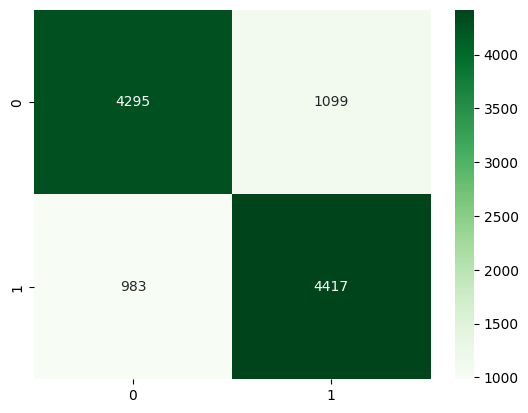

In [ ]:
# Avaliando o modelo

print(f'Acurácia do modelo: {accuracy_score(y_pred, y_test):.2%}\n')
sns.heatmap(confusion_matrix(y_test, y_pred),annot = True, cmap="Greens", fmt="d");

In [ ]:
# Testando novos dados com o modelo

def classifierNewData(text):
  text = process_text(text)
  text = bag_of_words.transform([text])
  return knn.predict(text)[0]

classifierNewData('O pedido chegou na hora certa')

'Positive'